In [79]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import string
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords



In [80]:
train = pd.read_csv('/home/joaquin/Desktop/Datos/tp2/train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [81]:
#Separo el label del set
X,y = train.iloc[:,:-1],train.iloc[:,-1]
X.head()

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [94]:
test = pd.read_csv('/home/joaquin/Desktop/Datos/tp2/test.csv')
test_ids = test['id']
#test_ids.head()
len(test_ids)

3263

In [83]:
def procesar(dataframe):
    
    stop = stopwords.words('english')

    dataframe['character_count'] = dataframe['text'].str.len()
    dataframe['mean_word_length'] = dataframe['text'].apply(lambda x: (sum(len(w) for w in str(x).split()) / len(str(x).split())))
    dataframe['punctuation_count'] = dataframe['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    dataframe['stop_words_count'] = dataframe['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop]))
    dataframe['words_count'] = dataframe['text'].apply(lambda x: len(str(x).split()))
    dataframe['stop_words_percentage'] = (dataframe['stop_words_count'] / dataframe['words_count']) * 100

    dataframe = dataframe.drop(['id','keyword','location','text','stop_words_count','words_count'], axis = 1)

In [84]:
procesar(X)
X = X.drop(['id','keyword','location','text','stop_words_count','words_count'], axis = 1)
X.head()

,character_count,mean_word_length,punctuation_count,stop_words_percentage
0,69,4.384615,1,46.153846
1,38,4.571429,1,0.000000
2,133,5.090909,3,50.000000
3,65,7.125000,2,12.500000
4,88,4.500000,2,43.750000


In [85]:
procesar(test)
test = test.drop(['id','keyword','location','text','stop_words_count','words_count'], axis = 1)
test.head()

,character_count,mean_word_length,punctuation_count,stop_words_percentage
0,34,4.833333,0,33.333333
1,64,6.222222,3,22.222222
2,96,4.105263,2,47.368421
3,40,9.250000,3,0.000000
4,45,4.750000,0,25.000000


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

In [87]:
#XGBoost
xg_bin = xgb.XGBClassifier(objective = 'binary:logistic',
                          colsample_btree = 0.3, learning_rate=0.1,
                          max_depth = 5, alpha = 10, n_estimators = 47)

In [88]:
#Entreno
xg_bin.fit(X_train,y_train)

[12:51:01] WARNING: /workspace/src/learner.cc:480: 
Parameters: { colsample_btree } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_btree=0.3,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=47, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
preds = xg_bin.predict(X_test)
preds

array([1, 0, 0, ..., 1, 0, 0])

In [90]:
accuracy = accuracy_score(y_test,preds)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 67.50%


con stop words count y words count: 66.91%.
con stop words percentage: 67.5%

67.5% con n estimators = [47,50,100] |
66.64% con n estimators = [25] |



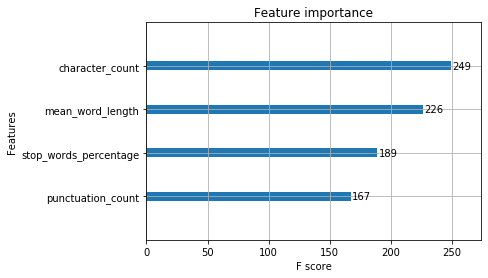

In [91]:
#Feature importance
plot_importance(xg_bin)
plt.show()

In [93]:
#predicciones del test set
final_preds = xg_bin.predict(test)
final_preds = pd.Series(final_preds)
final_preds

0       0
1       0
2       0
3       0
4       0
       ..
3258    1
3259    1
3260    0
3261    1
3262    0
Length: 3263, dtype: int64

In [100]:
df_preds = pd.concat([test_ids,final_preds],axis=1)
df_preds.to_csv('/home/joaquin/Desktop/Datos/tp2/XGBoost.csv')
df_preds.tail()

,id,0
3258,10861,1
3259,10865,1
3260,10868,0
3261,10874,1
3262,10875,0
